# About the Dataset

This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015. It was taken from [here](https://www.kaggle.com/harlfoxem/housesalesprediction?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-wwwcourseraorg-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2022-01-01). It was also slightly modified for the purposes of this course. 

# Import the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

# Module 1: Importing Data Sets

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     21613 non-null  int64  
 1   id             21613 non-null  int64  
 2   date           21613 non-null  object 
 3   price          21613 non-null  float64
 4   bedrooms       21600 non-null  float64
 5   bathrooms      21603 non-null  float64
 6   sqft_living    21613 non-null  int64  
 7   sqft_lot       21613 non-null  int64  
 8   floors         21613 non-null  float64
 9   waterfront     21613 non-null  int64  
 10  view           21613 non-null  int64  
 11  condition      21613 non-null  int64  
 12  grade          21613 non-null  int64  
 13  sqft_above     21613 non-null  int64  
 14  sqft_basement  21613 non-null  int64  
 15  yr_built       21613 non-null  int64  
 16  yr_renovated   21613 non-null  int64  
 17  zipcode        21613 non-null  int64  
 18  lat   

In [4]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Module 2: Data Wrangling

In [5]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True, errors='ignore')
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We can see we have missing values for the columns  bedrooms and  bathrooms 

In [6]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


We can replace the missing values of the column 'bedrooms' with the mean of the column 'bedrooms'  using the method replace().

In [7]:
mean=df['bedrooms'].mean()
df['bedrooms'] = df['bedrooms'].replace(np.nan, mean)

In [8]:
mean=df['bathrooms'].mean()
df['bathrooms'] = df['bathrooms'].replace(np.nan, mean)

In [9]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


# Module 3: Exploratory Data Analysis

Count the number of houses with unique floor values

In [10]:
floor_counts = df['floors'].value_counts().to_frame()
floor_counts

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


Determine whether houses with a waterfront view or without a waterfront view have more price outliers.

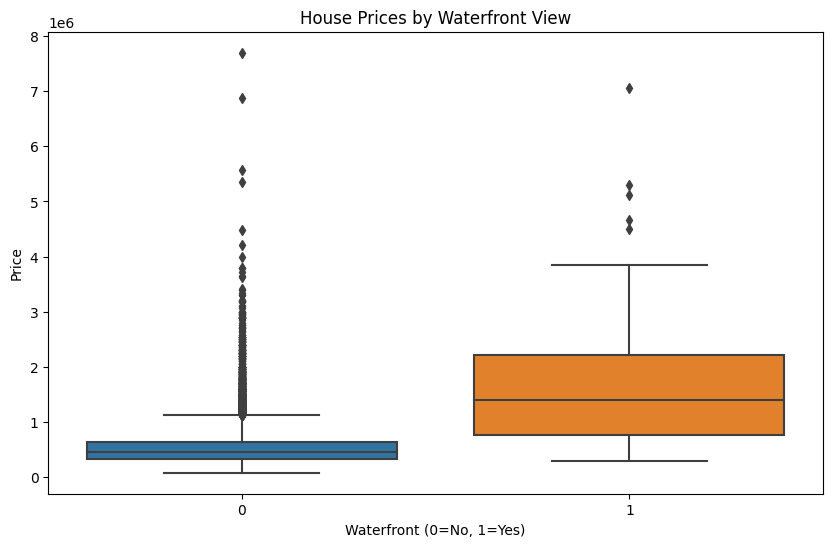

In [11]:
# Set figure size for better visibility
plt.figure(figsize=(10, 6))

# Create boxplot
sns.boxplot(x='waterfront', y='price', data=df)

# Add title and labels
plt.title('House Prices by Waterfront View')
plt.xlabel('Waterfront (0=No, 1=Yes)')
plt.ylabel('Price')

# Show the plot
plt.show()

Determine if the feature sqft_above is negatively or positively correlated with price

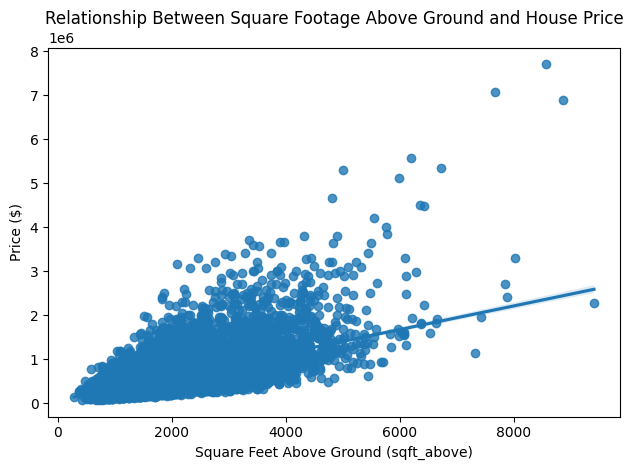

In [12]:
# Create regplot
sns.regplot(x='sqft_above', y='price', data=df)

# Add title and labels
plt.title('Relationship Between Square Footage Above Ground and House Price')
plt.xlabel('Square Feet Above Ground (sqft_above)')
plt.ylabel('Price ($)')

# Show the plot
plt.tight_layout()
plt.show()

Find the feature other than price that is most correlated with price.

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate correlation
correlation_matrix = numeric_df.corr()

# Sort correlations with price
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

# Display results
print(price_correlations)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525738
view             0.397293
sqft_basement    0.323816
bedrooms         0.308797
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64


# Module 4: Model Development

Feature 'long' and caculate the R^2

In [14]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
r_squared = lm.score(X, Y)
print(f"R² score: {r_squared}")

R² score: 0.00046769430149007363


predict the 'price' using the feature 'sqft_living' then calculate the R^2

In [15]:
# Prepare data: X needs to be 2D array, hence the double brackets
X = df[['sqft_living']]
y = df['price']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R² score
r_squared = model.score(X, y)
print(f"R² score: {r_squared}")

R² score: 0.4928532179037931


predict the 'price' using a list of features

In [16]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    

In [17]:
# Prepare the feature matrix X and target variable y
X = df[features]  # Use all features in the list
y = df['price']

# Create and fit the model
model = LinearRegression()
model.fit(X, y)

# Calculate R² score
r_squared = model.score(X, y)
print(f"R² score: {r_squared}")

R² score: 0.6576913270233171


In [18]:
# Define the pipeline steps
Input = [
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
]

# Create the pipeline
pipeline = Pipeline(Input)

# Prepare data
X = df[features]
y = df['price']

# Fit the pipeline
pipeline.fit(X, y)

# Calculate R² score
r_squared = pipeline.score(X, y)
print(f"R² score: {r_squared}")

R² score: 0.7507441092811101


# Module 5: Model Evaluation and Refinement

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


split the data into training and testing sets:

In [20]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
Y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

print("number of test samples:", X_test.shape[0])
print("number of training samples:", X_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [21]:
from sklearn.linear_model import Ridge

# Create a Ridge regression object with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model using the training data
ridge_model.fit(X_train, y_train)

# Calculate R^2 using the test data
r_squared = ridge_model.score(X_test, y_test)
print(f"Ridge Regression R² on test data: {r_squared}")

Ridge Regression R² on test data: 0.6478759163939113


In [22]:
# Create a polynomial transformer for second-order features
poly = PolynomialFeatures(degree=2)

# Transform both training and testing data
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create Ridge model with alpha=0.1
ridge_model = Ridge(alpha=0.1)

# Fit the model on polynomial-transformed training data
ridge_model.fit(X_train_poly, y_train)

# Calculate R² on polynomial-transformed test data
r_squared = ridge_model.score(X_test_poly, y_test)
print(f"Ridge Regression with Polynomial Features R² on test data: {r_squared}")

Ridge Regression with Polynomial Features R² on test data: 0.7002744280687769
